In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_reconstruct import *
from data_reconstruct.backend import *
from data_reconstruct.examples import *
from data_reconstruct.utilities import *

In [3]:
random_state = 42
np.random.seed(random_state)

# Load Data

In [4]:
# Read
mod1 = pd.read_csv('data/decennial_2020_nov8GAN.csv')[1:]
mod2 = pd.read_csv('data/public_150k_plus_210630.csv')
mod1_tagged = process_decennial(mod1)
mod2_tagged = process_ppp(mod2, extended=False)  # Limited dataset
mod1, mod1_cols, mod1_tags_cols = mod1_tagged
mod2, mod2_cols, mod2_tags_cols = mod2_tagged

# Merge
mod1, mod2, annotations = merge_data(mod1_tagged, mod2_tagged, agg_by_tag=True)

# Sample
num_samples = min(mod1.shape[0], 2000)
mod1_sample = mod1.sample(num_samples, random_state=random_state)
mod2_sample = mod2.sample(num_samples, random_state=random_state)
annotations_sample = annotations.sample(num_samples, random_state=random_state);

# Generate Merged Anonymous Records

In [5]:
anonymized_data_5 = anonymize(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    embedding_dim=5,
    embedding_kwargs={
        'project_mode': 'tsne',
        'epoch_pd': 1000,
        'log_pd': 200,
        'epoch_DNN': 100,
        'log_DNN': 100,
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (729, 6)
Dataset 1: (729, 4)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[200/1000] err:0.4023 alpha:1.1304
epoch:[400/1000] err:0.1626 alpha:0.4578
epoch:[600/1000] err:0.1996 alpha:0.5643
epoch:[800/1000] err:0.2308 alpha:0.6561
epoch:[1000/1000] err:0.2571 alpha:0.7368
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[100/100]: loss:3.808526, align_loss:0.495337
Done
---------------------------------
unionCom Done!
time: 9.065698385238647 seconds


In [6]:
anonymized_data_10 = anonymize(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    embedding_dim=10,
    embedding_kwargs={
        'project_mode': 'tsne',
        'epoch_pd': 1000,
        'log_pd': 200,
        'epoch_DNN': 100,
        'log_DNN': 100,
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (729, 6)
Dataset 1: (729, 4)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[200/1000] err:0.4023 alpha:1.1304
epoch:[400/1000] err:0.1626 alpha:0.4578
epoch:[600/1000] err:0.1996 alpha:0.5643
epoch:[800/1000] err:0.2308 alpha:0.6561
epoch:[1000/1000] err:0.2571 alpha:0.7368
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[100/100]: loss:3.316516, align_loss:0.509335
Done
---------------------------------
unionCom Done!
time: 9.85813283920288 seconds


In [7]:
anonymized_data_50 = anonymize(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    embedding_dim=50,
    embedding_kwargs={
        'project_mode': 'tsne',
        'epoch_pd': 1000,
        'log_pd': 200,
        'epoch_DNN': 100,
        'log_DNN': 100,
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (729, 6)
Dataset 1: (729, 4)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[200/1000] err:0.4023 alpha:1.1304
epoch:[400/1000] err:0.1626 alpha:0.4578
epoch:[600/1000] err:0.1996 alpha:0.5643
epoch:[800/1000] err:0.2308 alpha:0.6561
epoch:[1000/1000] err:0.2571 alpha:0.7368
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[100/100]: loss:2.416219, align_loss:0.297647
Done
---------------------------------
unionCom Done!
time: 13.785978078842163 seconds


# Preview Results

In [8]:
pd.DataFrame(anonymized_data_5[0], index=annotations_sample.iloc[:, 0])

,0,1,2,3,4
ProjectCountyName,,,,,
NESHOBA,-1.899713,-0.029810,-1.786216,-4.567956,-3.751472
CLEVELAND,1.821575,1.369006,-2.718911,1.095871,-1.578804
HUMBOLDT,0.706152,0.919597,-1.886202,0.286164,-1.194171
LAKE,0.188884,0.807551,-1.724733,-0.291709,-1.335002
PENOBSCOT,0.500918,-1.330341,0.221323,-1.367338,-0.115526
...,...,...,...,...,...
BRAZOS,-1.665899,1.008836,-2.457980,-3.222767,-3.590461
CASCADE,0.134557,0.381824,-1.013575,-0.079838,-0.538772
GUADALUPE,-2.099946,0.405944,-1.574889,-3.241779,-2.854525


# Usability

## Arbitrary Statistic Prediction

In [9]:
target = np.sqrt(mod1_sample['totalpop_other'] * mod2_sample['HEALTH_CARE_PROCEED']).to_numpy().reshape((-1, 1))
source_raw = pd.concat([mod1_sample, mod2_sample], axis=1).to_numpy().astype(np.float32)

### Before Anonymization

Epoch:  50    Loss:  0.00133


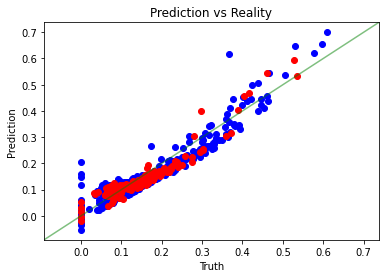

In [10]:
prediction, split_idx = predict_from_data(source_raw, target, nn_kwargs={'epochs': 50})
plot_example_results(target, prediction, split_idx=split_idx)

### After Anonymization

Epoch:  50    Loss:  0.00630
Epoch:  50    Loss:  0.00458
Epoch:  50    Loss:  0.00275


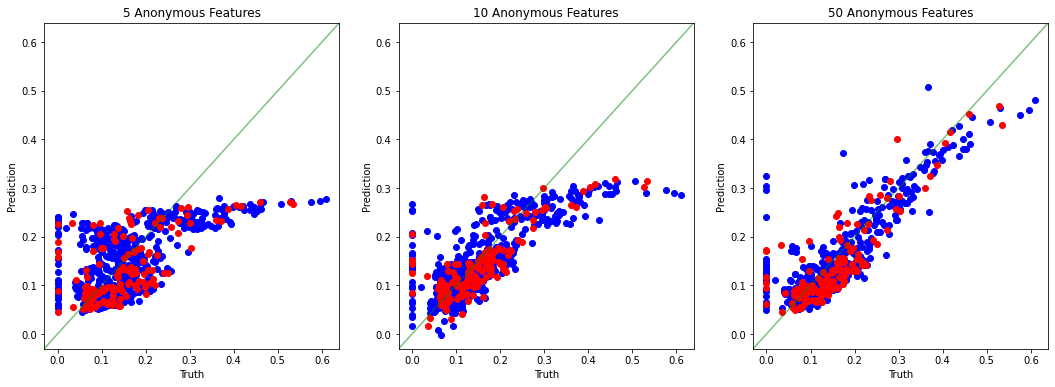

In [14]:
fig, axis = plt.subplots(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
plt.title('5 Anonymous Features')
prediction, split_idx = predict_from_data(anonymized_data_5[0], target, nn_kwargs={'epochs': 50})
plot_example_results(target, prediction, split_idx=split_idx, ax=ax)

ax = plt.subplot(1, 3, 2)
plt.title('10 Anonymous Features')
prediction, split_idx = predict_from_data(anonymized_data_10[0], target, nn_kwargs={'epochs': 50})
plot_example_results(target, prediction, split_idx=split_idx, ax=ax)

ax = plt.subplot(1, 3, 3)
plt.title('50 Anonymous Features')
prediction, split_idx = predict_from_data(anonymized_data_50[0], target, nn_kwargs={'epochs': 50})
plot_example_results(target, prediction, split_idx=split_idx, ax=ax)